# Fuzzy Logic-based Mobile Robot Path Planning code

In [1]:
pip install scikit-fuzzy  

Note: you may need to restart the kernel to use updated packages.


/Users/gurubalan/anaconda3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


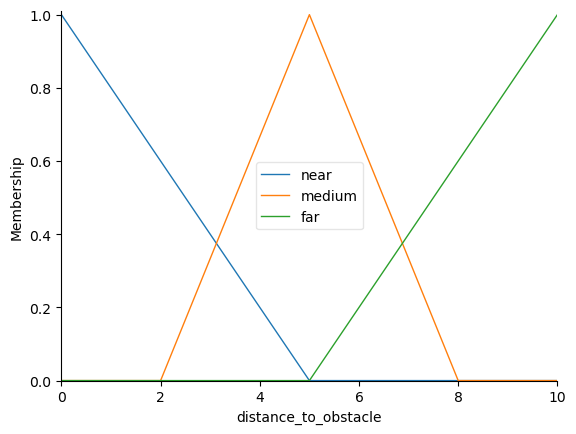

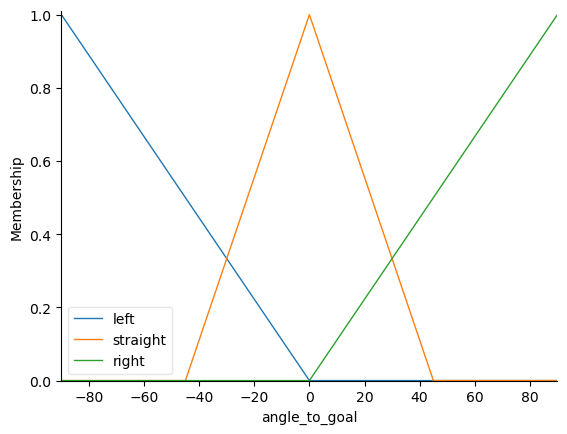

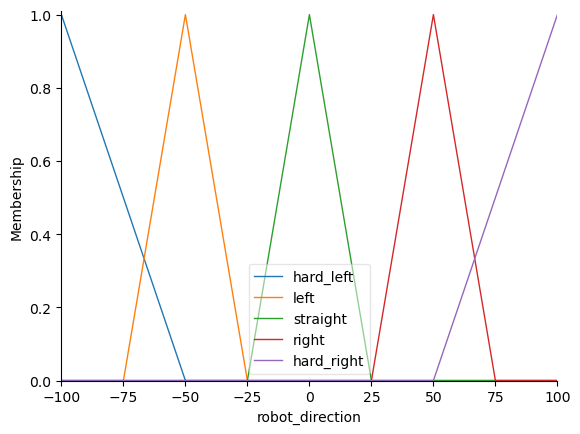

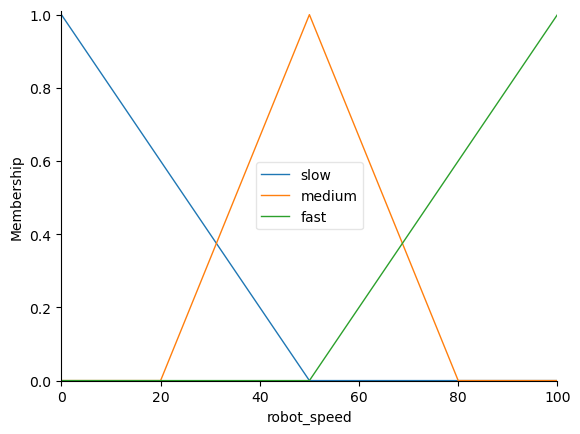

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
distance_to_obstacle = ctrl.Antecedent(np.arange(0, 11, 1), 'distance_to_obstacle')
angle_to_goal = ctrl.Antecedent(np.arange(-90, 91, 1), 'angle_to_goal')
robot_direction = ctrl.Consequent(np.arange(-100, 101, 1), 'robot_direction')
robot_speed = ctrl.Consequent(np.arange(0, 101, 1), 'robot_speed')

# Define membership functions
distance_to_obstacle['near'] = fuzz.trimf(distance_to_obstacle.universe, [0, 0, 5])
distance_to_obstacle['medium'] = fuzz.trimf(distance_to_obstacle.universe, [2, 5, 8])
distance_to_obstacle['far'] = fuzz.trimf(distance_to_obstacle.universe, [5, 10, 10])

angle_to_goal['left'] = fuzz.trimf(angle_to_goal.universe, [-90, -90, 0])
angle_to_goal['straight'] = fuzz.trimf(angle_to_goal.universe, [-45, 0, 45])
angle_to_goal['right'] = fuzz.trimf(angle_to_goal.universe, [0, 90, 90])

robot_direction['hard_left'] = fuzz.trimf(robot_direction.universe, [-100, -100, -50])
robot_direction['left'] = fuzz.trimf(robot_direction.universe, [-75, -50, -25])
robot_direction['straight'] = fuzz.trimf(robot_direction.universe, [-25, 0, 25])
robot_direction['right'] = fuzz.trimf(robot_direction.universe, [25, 50, 75])
robot_direction['hard_right'] = fuzz.trimf(robot_direction.universe, [50, 100, 100])

robot_speed['slow'] = fuzz.trimf(robot_speed.universe, [0, 0, 50])
robot_speed['medium'] = fuzz.trimf(robot_speed.universe, [20, 50, 80])
robot_speed['fast'] = fuzz.trimf(robot_speed.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(distance_to_obstacle['near'] & angle_to_goal['left'], (robot_direction['hard_right'], robot_speed['slow']))
rule2 = ctrl.Rule(distance_to_obstacle['near'] & angle_to_goal['straight'], (robot_direction['hard_right'], robot_speed['medium']))
rule3 = ctrl.Rule(distance_to_obstacle['near'] & angle_to_goal['right'], (robot_direction['right'], robot_speed['medium']))

rule4 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_goal['left'], (robot_direction['left'], robot_speed['medium']))
rule5 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_goal['straight'], (robot_direction['straight'], robot_speed['fast']))
rule6 = ctrl.Rule(distance_to_obstacle['medium'] & angle_to_goal['right'], (robot_direction['right'], robot_speed['fast']))

rule7 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_goal['left'], (robot_direction['hard_left'], robot_speed['medium']))
rule8 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_goal['straight'], (robot_direction['hard_left'], robot_speed['fast']))
rule9 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_goal['right'], (robot_direction['left'], robot_speed['fast']))

# Create control system
robot_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# Compute robot action
robot_action = ctrl.ControlSystemSimulation(robot_ctrl)

# Set inputs
robot_action.input['distance_to_obstacle'] = 4
robot_action.input['angle_to_goal'] = -30

# Compute the result
robot_action.compute()

# Visualize the result
distance_to_obstacle.view()
angle_to_goal.view()
robot_direction.view()
robot_speed.view()
plt.show()
